In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("C:/Users/User/Desktop/data analytics/retail_sales_dataset.csv")

print("df type:", type(df))
print("df shape:", df.shape)
df.info()
df.head()

df type: <class 'pandas.core.frame.DataFrame'>
df shape: (1000, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [3]:
#standardize date column
df['Date'] = pd.to_datetime(df['Date'])

#clear empty extra spaces
df.columns = df.columns.str.strip()

# Drop duplicates if any
df.drop_duplicates(inplace=True)

# Fill or handle missing values (example: drop missing customer IDs)
df = df.dropna(subset=['Customer ID'])

df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [4]:
max_age = df['Age'].max()
min_age = df['Age'].min()

print("highest_Age:", max_age)
print("lowest_Age:", min_age)

df['Revenue_per_Item'] = df['Total Amount'] / df['Quantity']
df['Revenue_per_Customer'] = df.groupby('Customer ID')['Total Amount'].transform('sum')
df.head()

highest_Age: 64
lowest_Age: 18


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Revenue_per_Item,Revenue_per_Customer
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,50.0,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,500.0,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,30.0,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,500.0,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,50.0,100


In [5]:
# Create age groups
bins = [18, 25, 35, 45, 55, 65]
labels = ['18-25','26-35','36-45','46-55','56-65']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Revenue_per_Item,Revenue_per_Customer,Age Group
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,50.0,150,26-35
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,500.0,1000,26-35
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,30.0,30,46-55
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,500.0,500,36-45
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,50.0,100,26-35


In [6]:
# Descriptive Statistics ---
print("\n--- Numerical Summary ---\n", df.describe())
print("\n--- Category Counts ---\n", df['Product Category'].value_counts())


--- Numerical Summary ---
        Transaction ID                           Date         Age     Quantity  \
count     1000.000000                           1000  1000.00000  1000.000000   
mean       500.500000  2023-07-03 00:25:55.200000256    41.39200     2.514000   
min          1.000000            2023-01-01 00:00:00    18.00000     1.000000   
25%        250.750000            2023-04-08 00:00:00    29.00000     1.000000   
50%        500.500000            2023-06-29 12:00:00    42.00000     3.000000   
75%        750.250000            2023-10-04 00:00:00    53.00000     4.000000   
max       1000.000000            2024-01-01 00:00:00    64.00000     4.000000   
std        288.819436                            NaN    13.68143     1.132734   

       Price per Unit  Total Amount  Revenue_per_Item  Revenue_per_Customer  
count     1000.000000   1000.000000       1000.000000           1000.000000  
mean       179.890000    456.000000        179.890000            456.000000  
min     

C:\Users\User\AppData\Local\Temp\ipykernel_2616\2445319300.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Gender', ax=ax[1,0], palette='Set2')
C:\Users\User\AppData\Local\Temp\ipykernel_2616\2445319300.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='Product Category', ax=ax[1,1], palette='viridis')


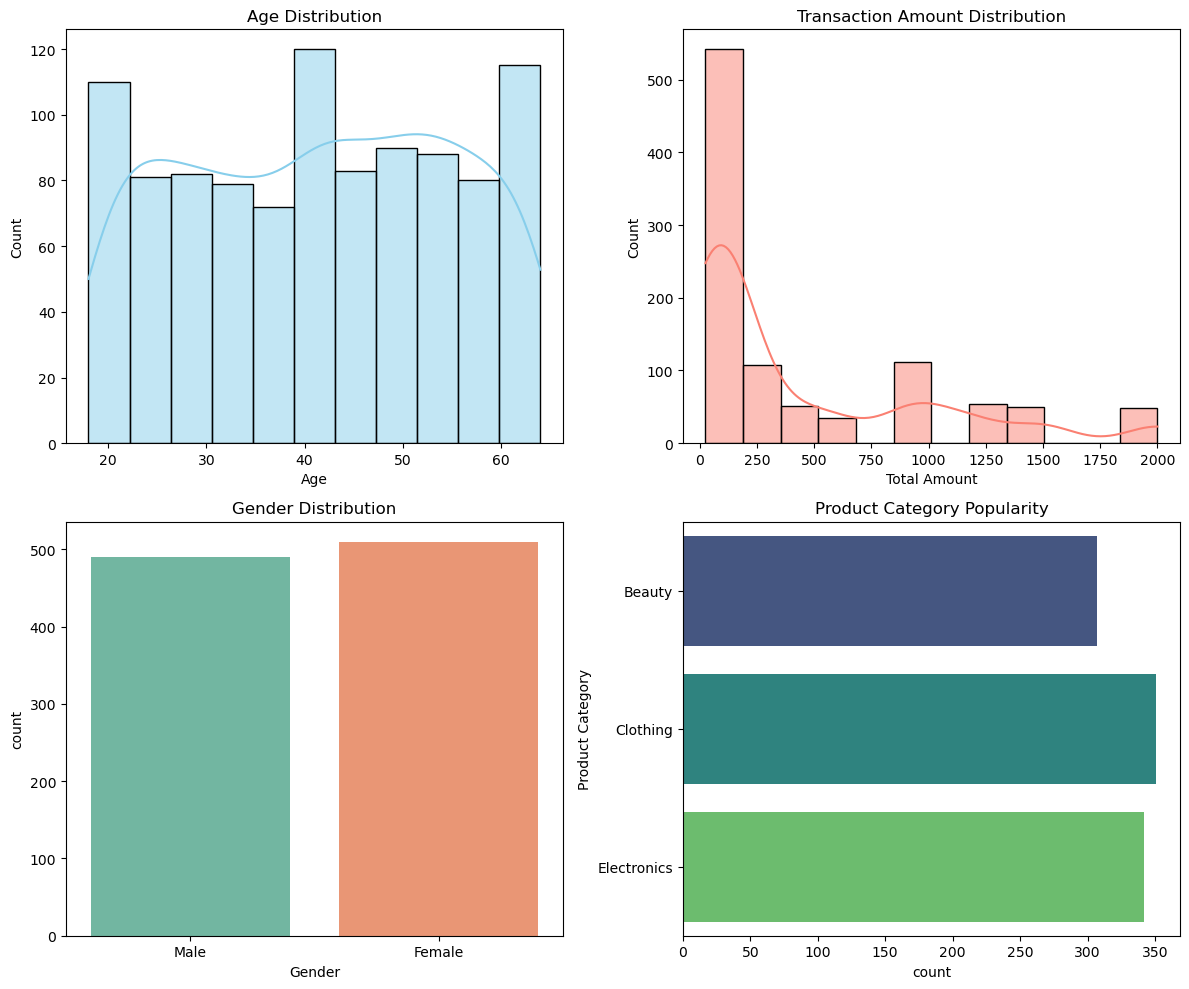

In [7]:
#Univariate Analysis ---
fig, ax = plt.subplots(2, 2, figsize=(12, 10))

sns.histplot(df['Age'], kde=True, ax=ax[0,0], color='skyblue')
ax[0,0].set_title('Age Distribution')

sns.histplot(df['Total Amount'], kde=True, ax=ax[0,1], color='salmon')
ax[0,1].set_title('Transaction Amount Distribution')

sns.countplot(data=df, x='Gender', ax=ax[1,0], palette='Set2')
ax[1,0].set_title('Gender Distribution')

sns.countplot(data=df, y='Product Category', ax=ax[1,1], palette='viridis')
ax[1,1].set_title('Product Category Popularity')
 
plt.tight_layout()
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_2616\4046624031.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


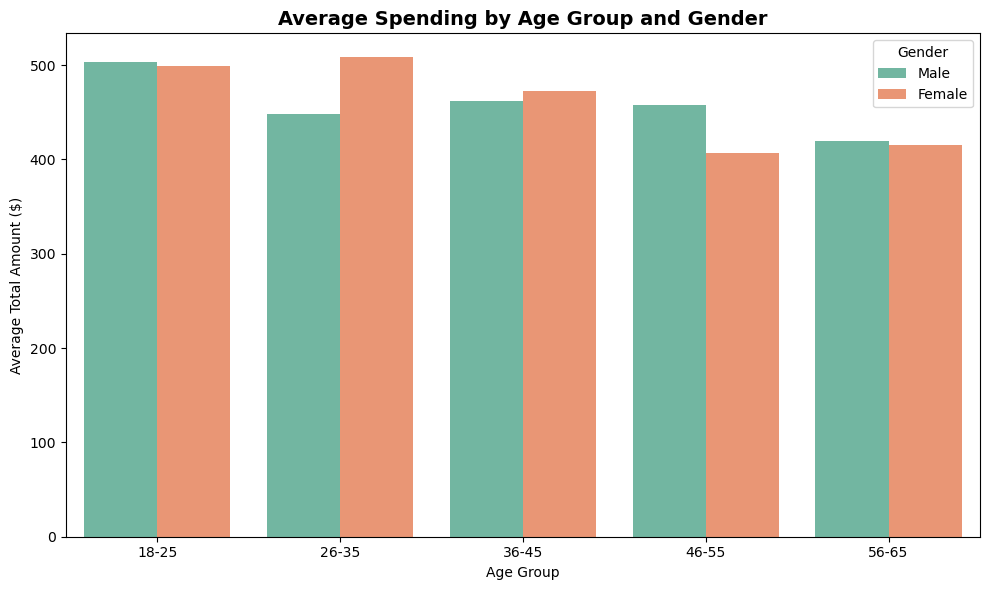

In [15]:
# How does customer age and gender influence their purchasing behavior?

plt.figure(figsize=(10,6))
sns.barplot(
    data=df,
    x='Age Group',           # age brackets along the x-axis
    y='Total Amount',        # spending on the y-axis
    hue='Gender',            # separate bars by gender
    estimator='mean',        # or 'sum' depending on what you want
    ci=None,                 # remove error bars for cleaner look
    palette='Set2'           # distinct colors for genders
)
plt.title('Average Spending by Age Group and Gender', fontsize=14, weight='bold')
plt.xlabel('Age Group')
plt.ylabel('Average Total Amount ($)')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

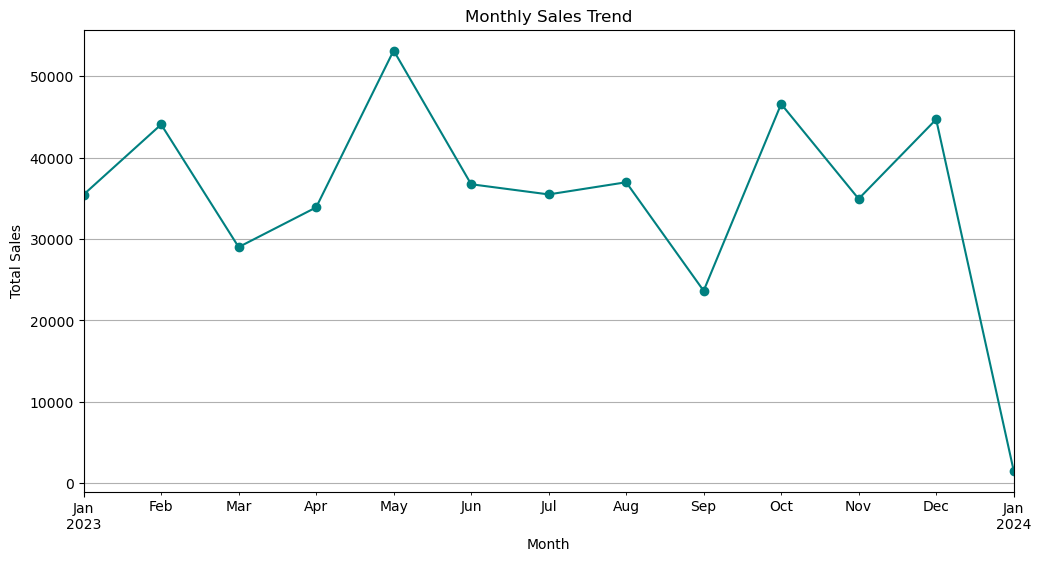

In [9]:
# Are there discernible patterns in sales across different time periods?

monthly_sales = df.groupby(df['Date'].dt.to_period('M'))['Total Amount'].sum()
monthly_sales.index = monthly_sales.index.to_timestamp()

plt.figure(figsize=(12,6))
monthly_sales.plot(kind='line', marker='o', color='teal')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_2616\4272225672.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Month', y='Total Amount', estimator='mean', ci=None, palette='coolwarm')
C:\Users\User\AppData\Local\Temp\ipykernel_2616\4272225672.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Month', y='Total Amount', estimator='mean', ci=None, palette='coolwarm')


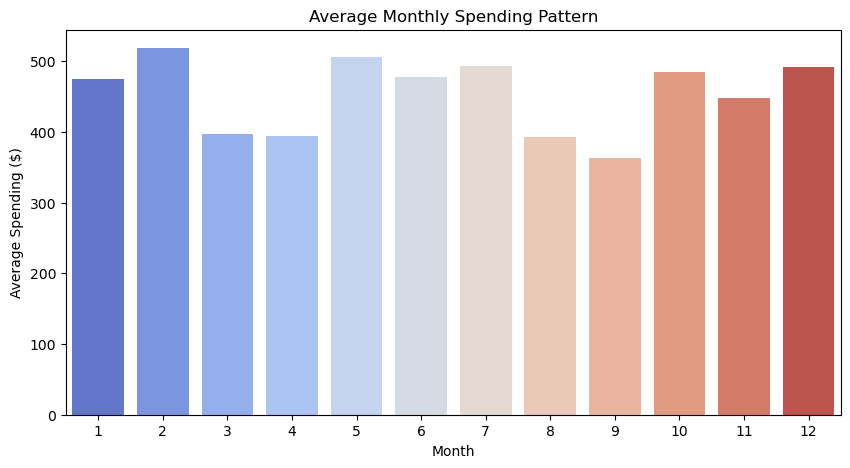

In [17]:
df['Month'] = df['Date'].dt.month
plt.figure(figsize=(10,5))
sns.barplot(data=df, x='Month', y='Total Amount', estimator='mean', ci=None, palette='coolwarm')
plt.title('Average Monthly Spending Pattern')
plt.xlabel('Month')
plt.ylabel('Average Spending ($)')
plt.show()


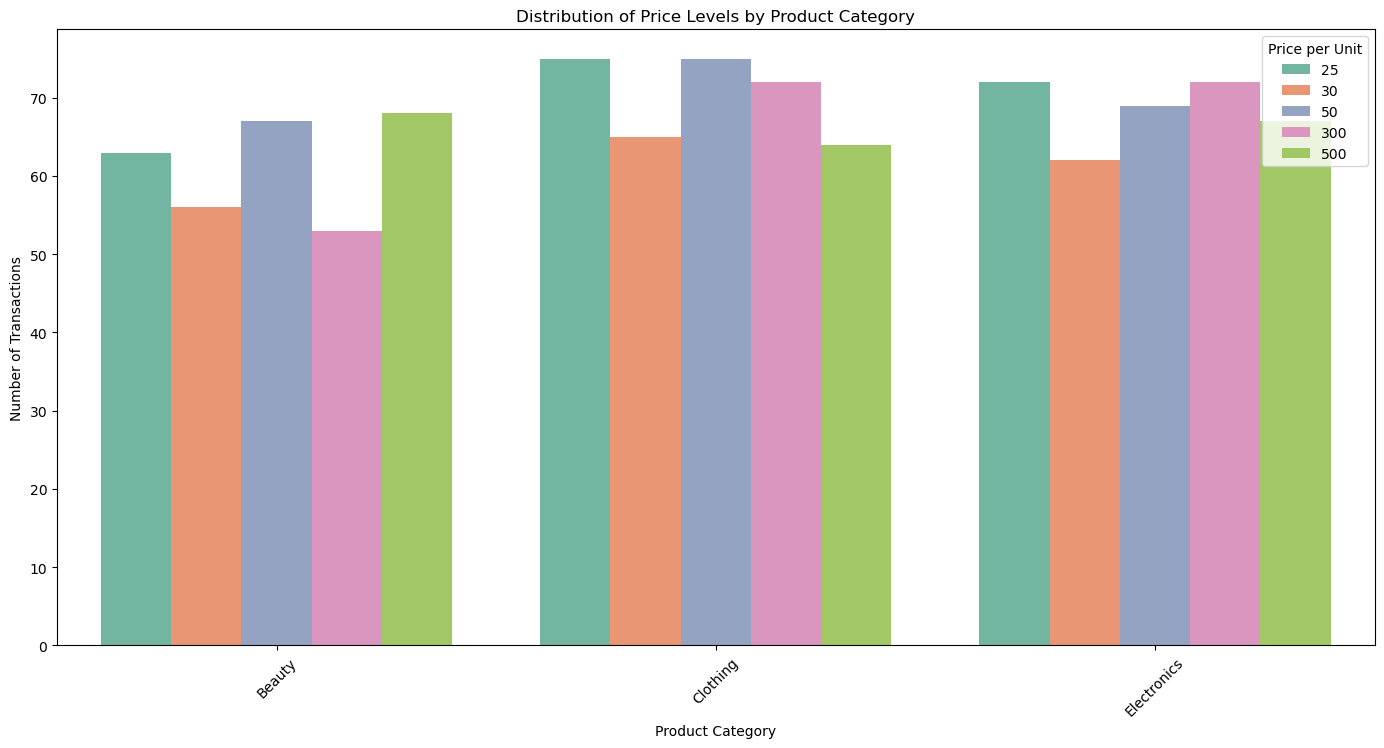

In [30]:
# What insights can be gleaned from the distribution of product prices within each category?

plt.figure(figsize=(17,8))
sns.countplot(data=df, x='Product Category', hue='Price per Unit', palette='Set2')
plt.title('Distribution of Price Levels by Product Category')
plt.xticks(rotation=45)
plt.ylabel('Number of Transactions')
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_2616\874429494.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Age Group', y='Total Amount', hue='Product Category', estimator='mean', ci=None, palette='Spectral')


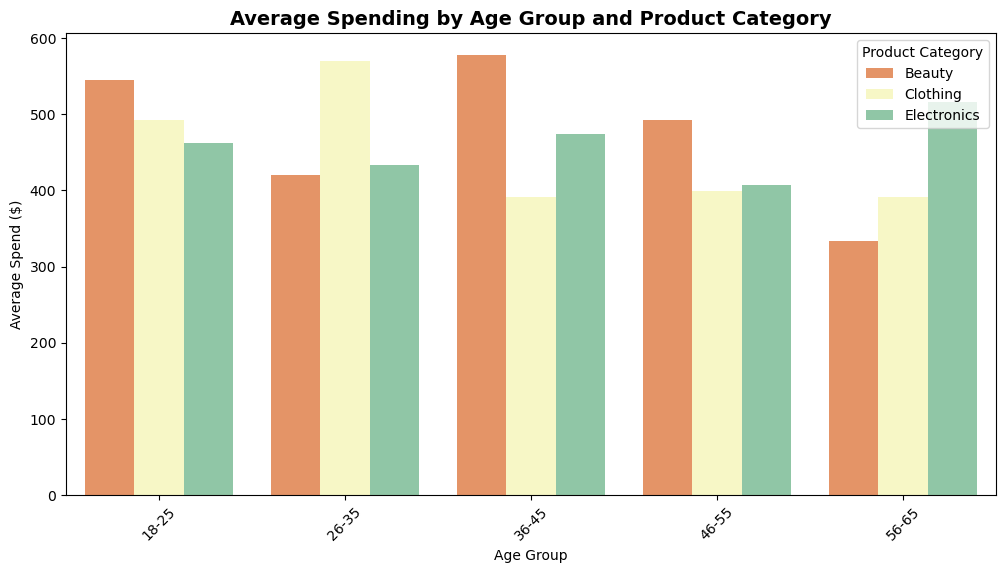

In [19]:
# Age × Product Preference
plt.figure(figsize=(12,6))
sns.barplot(data=df, x='Age Group', y='Total Amount', hue='Product Category', estimator='mean', ci=None, palette='Spectral')
plt.title('Average Spending by Age Group and Product Category', fontsize=14, weight='bold')
plt.xticks(rotation=45)
plt.ylabel('Average Spend ($)')
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_2616\2056647366.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  bars = sns.barplot(
C:\Users\User\AppData\Local\Temp\ipykernel_2616\2056647366.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(


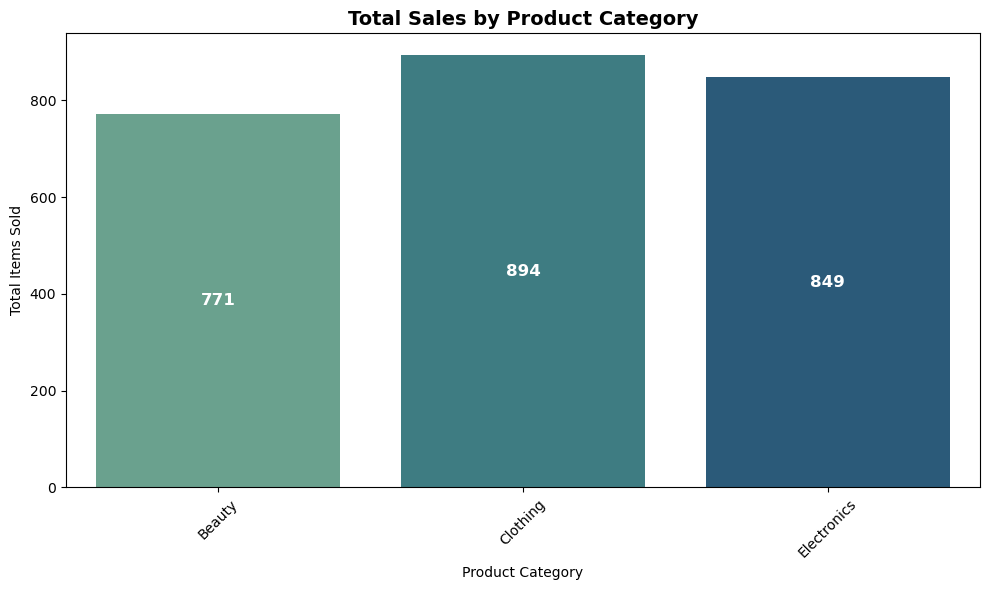

In [47]:
# Total Sales by Product Category (number of items sold)
plt.figure(figsize=(10,6))
bars = sns.barplot(
    data=df, 
    x='Product Category', 
    y='Quantity',        # <-- sum of items sold
    estimator='sum', 
    ci=None, 
    palette='crest'
)

# Add annotations inside the bars
for bar in bars.patches:
    height = bar.get_height()
    bars.annotate(f"{int(height):,}",  # <-- plain number for quantity
                  xy=(bar.get_x() + bar.get_width() / 2, height / 2),  # middle of the bar
                  ha='center', 
                  va='center', 
                  color='white', 
                  fontsize=12,
                  fontweight='bold')

plt.title('Total Sales by Product Category', fontsize=14, weight='bold')
plt.xticks(rotation=45)
plt.ylabel('Total Items Sold')
plt.tight_layout()
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_2616\1726443661.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=product_revenue.index, y=product_revenue.values, palette='crest')


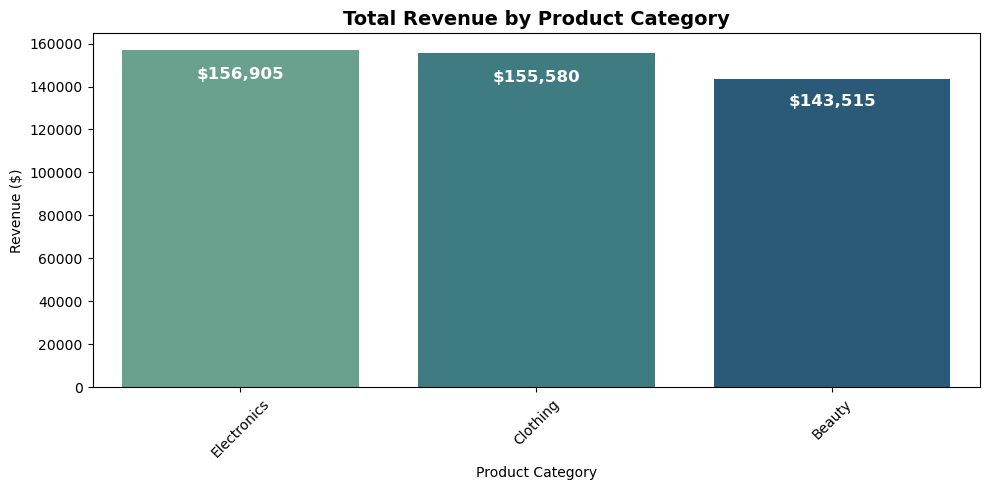

In [48]:
# Total revenue per product category
product_revenue = df.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,5))
bars = sns.barplot(x=product_revenue.index, y=product_revenue.values, palette='crest')

# Add annotations inside the bars
for bar in bars.patches:
    height = bar.get_height()
    bars.annotate(f"${int(height):,}", 
                  xy=(bar.get_x() + bar.get_width() / 2, height - (0.05 * height)),  # slightly below top
                  ha='center', 
                  va='top', 
                  color='white', 
                  fontsize=12,
                  fontweight='bold')

plt.title('Total Revenue by Product Category', fontsize=14, weight='bold')
plt.xticks(rotation=45)
plt.ylabel('Revenue ($)')
plt.tight_layout()
plt.show()


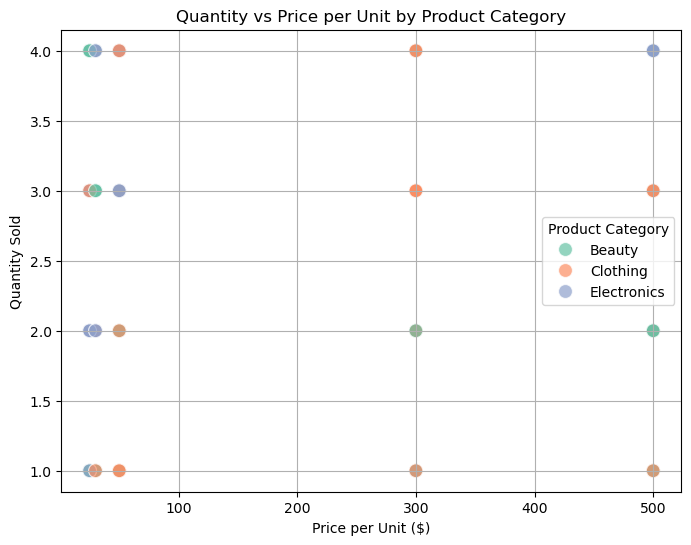

In [49]:
# Correlation matrix
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df, 
    x='Price per Unit', 
    y='Quantity', 
    hue='Product Category', 
    palette='Set2', 
    alpha=0.7, 
    s=100
)
plt.title('Quantity vs Price per Unit by Product Category')
plt.xlabel('Price per Unit ($)')
plt.ylabel('Quantity Sold')
plt.grid(True)
plt.show()

